# Predicting Income based on census data

This is a binary classification task to predict if income is above or below a certain threshold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt


In [2]:
census_data = pd.read_csv('censusDB.csv')

In [3]:
census_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,Male,0,3004,60,?,>50K


### Exploratory Data Analysis

In [4]:
#check unique values in education-num column
census_data['education-num'].unique() 

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [5]:
#check unique values in education-num column: Alternative
print(census_data['education-num'].unique())

[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]


In [6]:
#check unique values in education column
census_data.education.unique() 

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [7]:
#check shape of the data
census_data.shape

(32561, 14)

In [8]:
#check info() of your data frame
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [9]:
census_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
income_dist = census_data.income.value_counts(normalize=True) 
income_dist

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

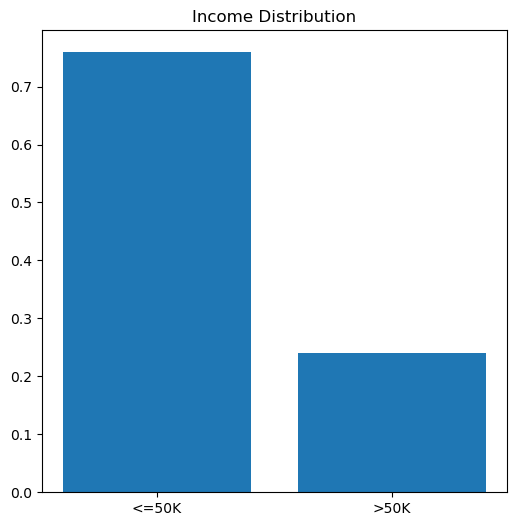

In [11]:
plt.figure(figsize=(6,6))
plt.bar(x=income_dist.index, height=income_dist)
plt.title('Income Distribution')

plt.show()

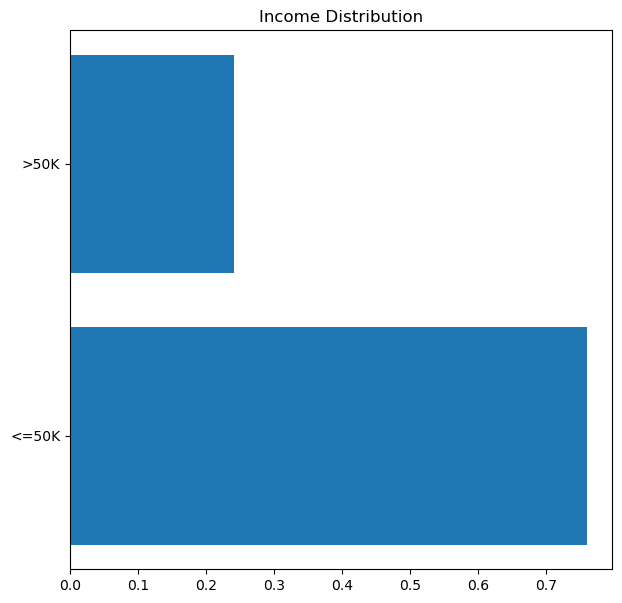

In [12]:
plt.figure(figsize=(7,7))
plt.barh(y=income_dist.index, width=income_dist)
plt.title('Income Distribution')

plt.show()

In [13]:
#check values in work class column with value_counts()
wc_list = census_data.workclass.value_counts()
wc_list

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
#check values in work class column with value_counts()
#using normalize
wc_list = census_data.workclass.value_counts(normalize=True)
wc_list

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64

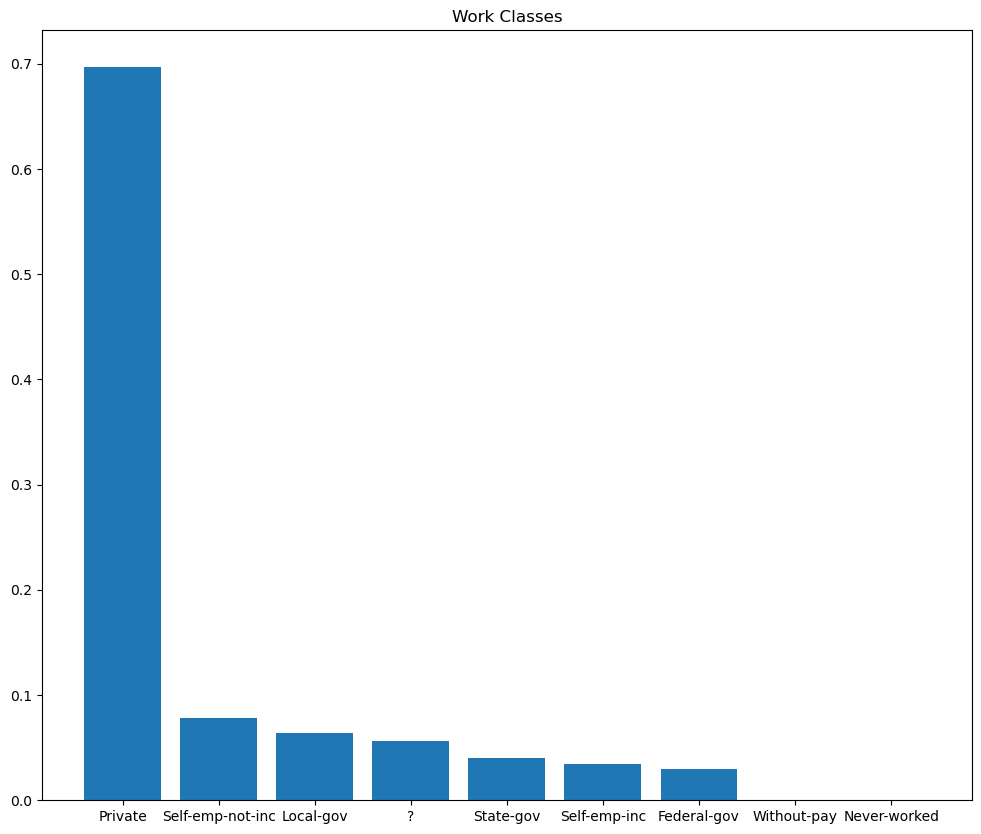

In [15]:
#graphical representation of work class segments
plt.figure(figsize=(12,10))
plt.bar(x=wc_list.index, height=wc_list)
plt.title('Work Classes')

plt.show()

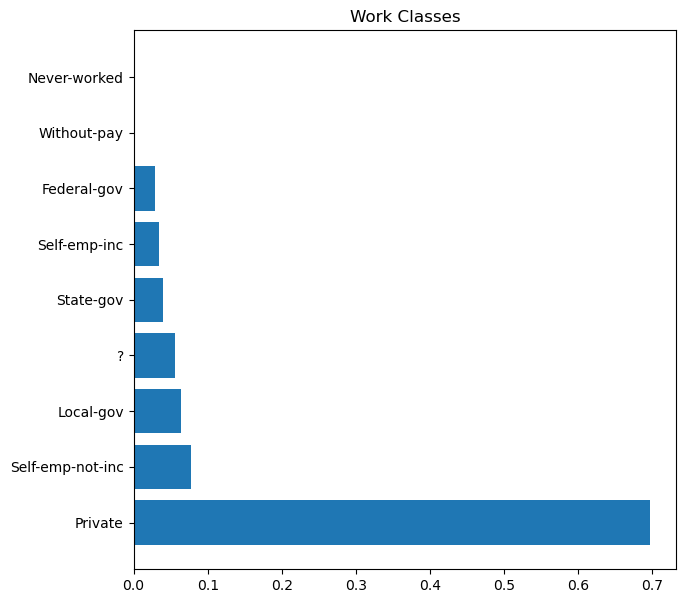

In [16]:
#graphical representation of work class segments
plt.figure(figsize=(7,7))
plt.barh(y=wc_list.index, width=wc_list)
plt.title('Work Classes')

plt.show()

Text(0.5, 1.0, 'Work Classes')

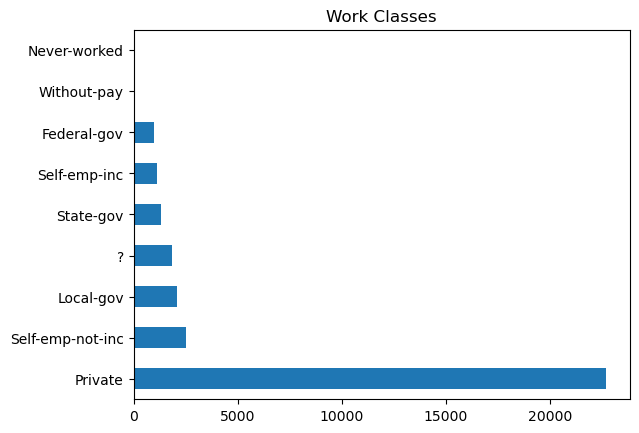

In [17]:
#visualize work class column

census_data.workclass.value_counts().plot.barh()
plt.title('Work Classes')

Text(0.5, 1.0, 'Income distribution by sex')

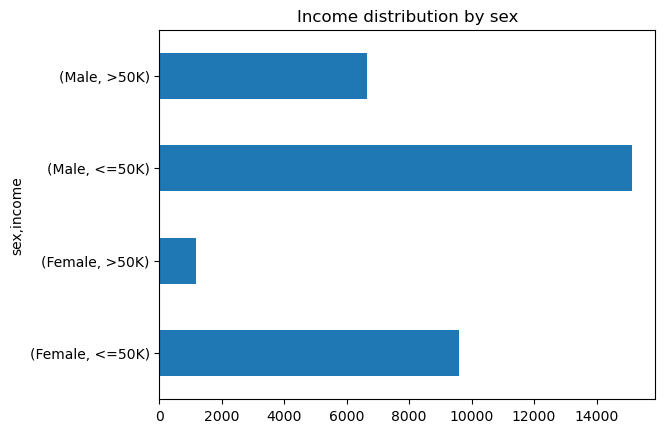

In [18]:
#income by sex using 'groupby':
census_data.groupby('sex').income.value_counts().plot.barh()
plt.title('Income distribution by sex')

Text(0.5, 1.0, 'Income distribution by sex')

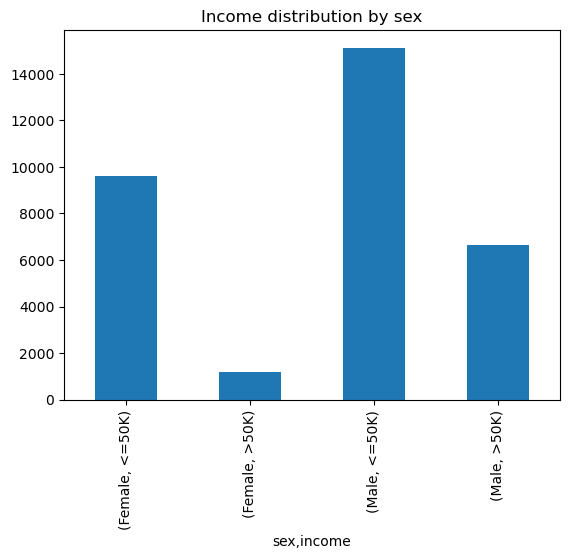

In [19]:
#income by sex using 'groupby' with vertical graph:
census_data.groupby('sex').income.value_counts().plot.bar()
plt.title('Income distribution by sex')

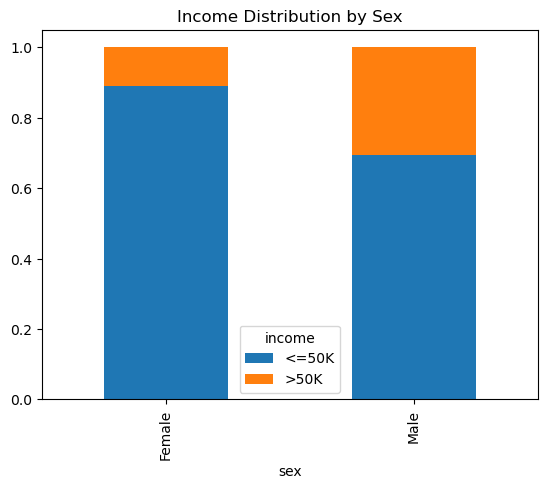

In [20]:
#check incomes by sex

#create pivot of sex and income
sex_income_pivot = pd.crosstab(census_data.sex,census_data.income,normalize='index')

#plot the data
sex_income_pivot.plot.bar(stacked=True)

plt.title('Income Distribution by Sex')
plt.show()

How do the sexes compare with income capacity?

<Axes: >

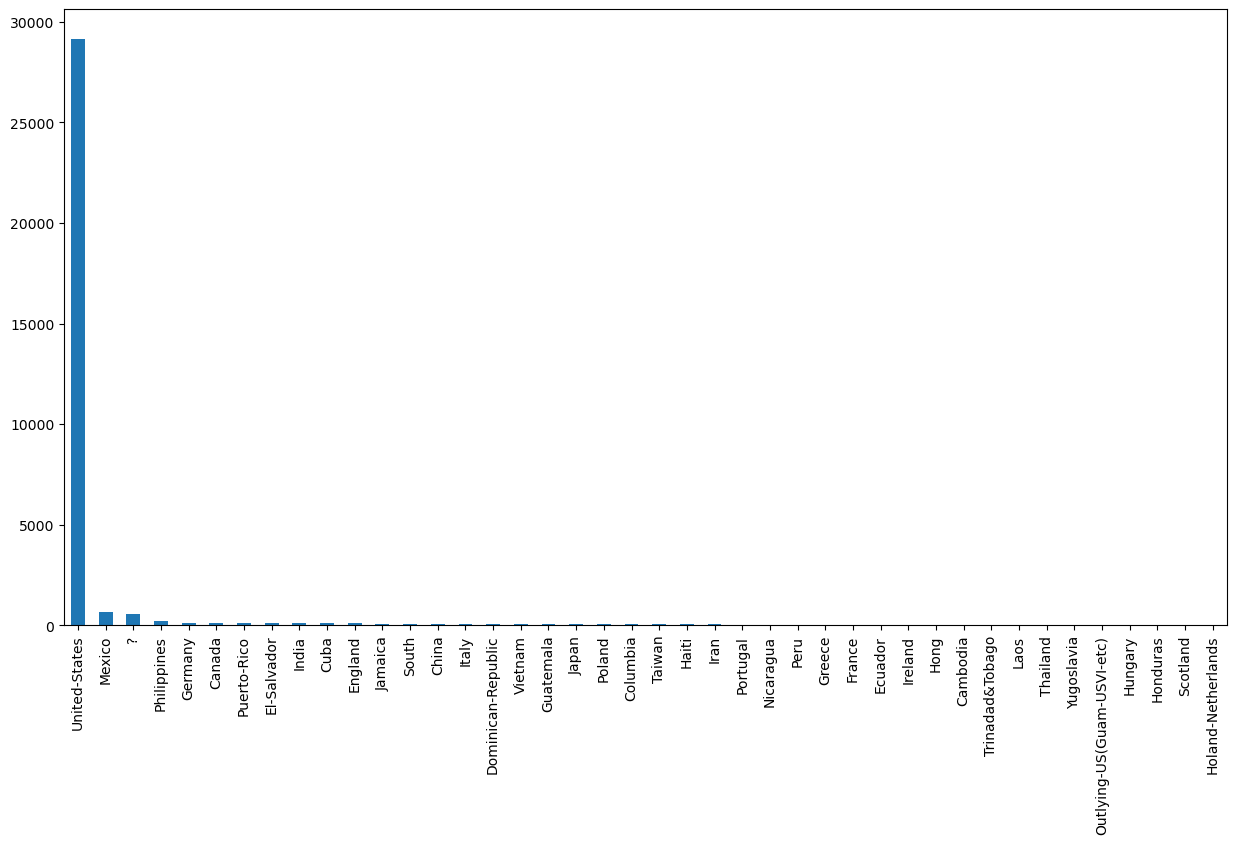

In [21]:
#check native countries represented in the data

plt.figure(figsize=(15,8))
census_data['native-country'].value_counts().plot.bar()

Text(0.5, 1.0, 'Income distribution by education')

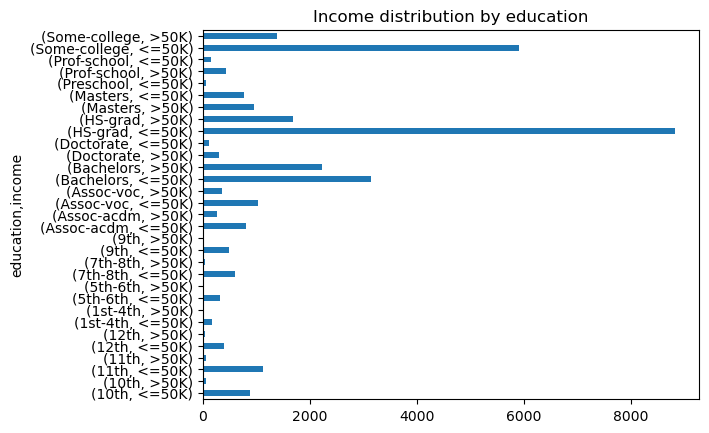

In [22]:
#income by education using 'groupby':
census_data.groupby('education').income.value_counts().plot.barh()
plt.title('Income distribution by education')

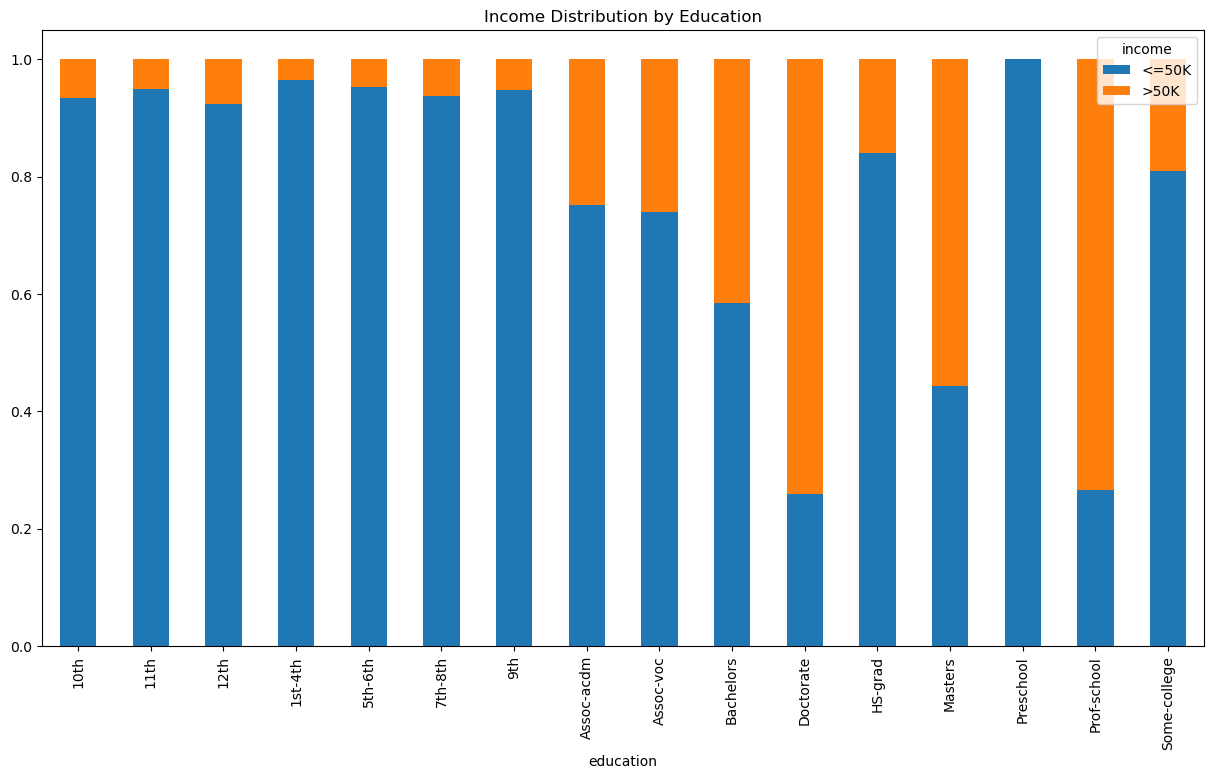

In [23]:
#what effect does education have on income

#create pivot of sex and income
education_income_pivot = pd.crosstab(census_data.education,census_data.income,normalize='index')

#plot the data
education_income_pivot.plot.bar(stacked=True, figsize=(15,8))

plt.title('Income Distribution by Education')
plt.show()

## Feature Engineering


In [24]:
census_data.replace({'?':'Unknown', '<=50K':0, '>50K':1}, inplace=True)

census_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,0
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,0


In [25]:
census_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,0
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,Male,0,3004,60,Unknown,1


In [26]:
census_data.tail(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Male,0,0,50,United-States,0
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,0
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,Male,0,0,45,United-States,0
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Male,0,0,11,Taiwan,0
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,United-States,1
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,0
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,0


### One-Hot Encoding


In [27]:
#handling categorical variables

categorical = ['workclass','occupation','marital-status','relationship','sex','native-country']

#use pd.get_dummies() for one hot encoding

categories_dummies = pd.get_dummies(census_data[categorical])
categories_dummies.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,occupation_Adm-clerical,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
census_data = pd.concat([census_data,categories_dummies], axis=1)

print(census_data.shape)
census_data.head()

(32561, 95)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,...,0,0,0,0,0,0,1,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,...,0,0,0,0,0,0,1,0,0,0
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,...,0,0,0,0,0,0,1,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,...,0,0,0,0,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
census_data = census_data.drop(categorical,axis=1)

census_data.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,90,77053,HS-grad,9,0,4356,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,HS-grad,9,0,4356,18,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,Some-college,10,0,4356,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,7th-8th,4,0,3900,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,Some-college,10,0,3900,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
census_data = census_data.drop('education', axis=1)

In [31]:
print(census_data.shape)
census_data.head()

(32561, 88)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Choose your target

In [32]:
y=census_data.income
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [33]:
X = census_data.drop('income', axis=1)
X.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,34,216864,9,0,3770,45,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,38,150601,6,0,3770,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,74,88638,16,0,3683,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,68,422013,9,0,3683,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,41,70037,10,0,3004,60,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unknown', 'workclass_Without-pay', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'occupation_Unknown',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married

### Preparing the models

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [36]:
#split into training and validation sets
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)

In [37]:
initialize logistic regression
LR = LogisticRegression(random_state=1)

In [38]:
initialize k neighbors
KN = KNeighborsClassifier()

In [39]:
initialize decision tree
DC = DecisionTreeClassifier(random_state=1)

In [40]:
initialize random forest
RF = RandomForestClassifier(random_state=1)

In [41]:
#create list of your model names
models = [LR,KN,DC,RF]

In [42]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_valid,y_valid):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction,y_valid)) #use this later
    

In [43]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)
    


For LogisticRegression, Accuracy score is 0.8020729366602687 

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     11866
           1       0.27      0.73      0.40      1159

    accuracy                           0.80     13025
   macro avg       0.62      0.77      0.64     13025
weighted avg       0.91      0.80      0.84     13025


For KNeighborsClassifier, Accuracy score is 0.7810364683301344 

              precision    recall  f1-score   support

           0       0.92      0.81      0.87     11278
           1       0.32      0.57      0.41      1747

    accuracy                           0.78     13025
   macro avg       0.62      0.69      0.64     13025
weighted avg       0.84      0.78      0.80     13025


For DecisionTreeClassifier, Accuracy score is 0.8122840690978886 

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9857
           1       0.62      0.60      

### Inspect Feature Importances

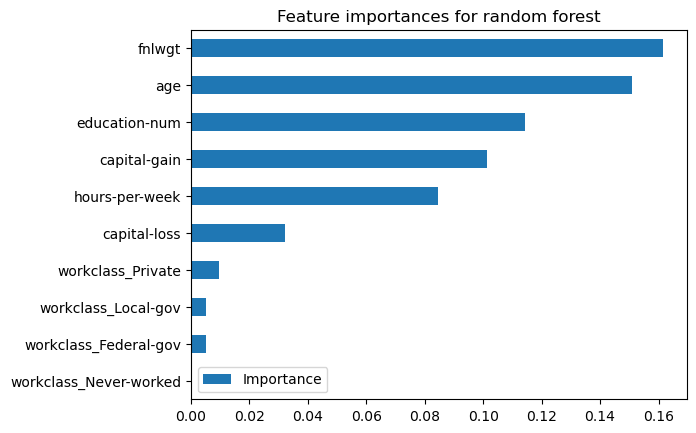

In [44]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [45]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['workclass_Never-worked', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'capital-loss',
       'hours-per-week', 'capital-gain', 'education-num', 'age', 'fnlwgt'],
      dtype=object)

### A Bit of Feature Selection

In [46]:
#create a new X train with only 10 features
X_train2 = X_train[['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'education-num',
       'marital-status_Married-civ-spouse', 'relationship_Husband',
       'capital-loss', 'marital-status_Never-married',
       'occupation_Exec-managerial']]
X_train2.head(2)

,fnlwgt,age,capital-gain,hours-per-week,education-num,marital-status_Married-civ-spouse,relationship_Husband,capital-loss,marital-status_Never-married,occupation_Exec-managerial
30,44064,23,0,40,10,0,0,2559,0,0
11593,149455,38,0,40,9,0,0,0,1,0


In [47]:
#create a new X_valid with only 10 features so we can predict on them
X_valid2 = X_valid[['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'education-num',
       'marital-status_Married-civ-spouse', 'relationship_Husband',
       'capital-loss', 'marital-status_Never-married',
       'occupation_Exec-managerial']]

In [48]:
#train and predict
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2,y_valid))

0.8502879078694817


## Evaluating with Cross Validation


In [49]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [50]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))
    

In [51]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,X_train2,y_train)
    

Accuracy: 0.795
Accuracy: 0.773
Accuracy: 0.804
Accuracy: 0.843
